# Project 1

As I was going over datasets, I had a question come to mind when looking at the history of the Olympic games. That question was which geographical region has been, historically, the most successful? The way I went about this focused on grouping different countries and their nearest neighbors. I originally focused on continents, but I had to break down some places, so here are the following regions:

1 - US, Canada, Greenland - The Great Northwest
2 - Central America and the Carribean - CAC
3 - South America
4 - Western Europe
5 - Eastern Europe
6 - Scandinavia
7 - Russia and Central Asia (Mongolia, Kazakhstan, Turkey, etc)
8 - Arabian Nights - Mideast, Northern Africa
9 - Sub-Saharan Africa
10 - South Asia (India, Thailand, Pakistan, Vietnam, etc)
11 - East Asia (China, Japan, Koreas, Taiwan)
12 - Oceania

These were vaguely grouped by economic might, though I did not do much research on that one. Geography and economy came into play. The US is one country, but it's also the richest country on the planet, so the Great Northwest has less countries than anywhere else.

Sidenote: The Scandis are the Scandis, I didn't think too much about that one. And I'm not sure about grouping so many African countries together, but this is a case of my personal ignorance showing. Along with that, Greenland is a non-factor as they don't compete individually, and all their results are added to Denmarks. It just looks better this way.

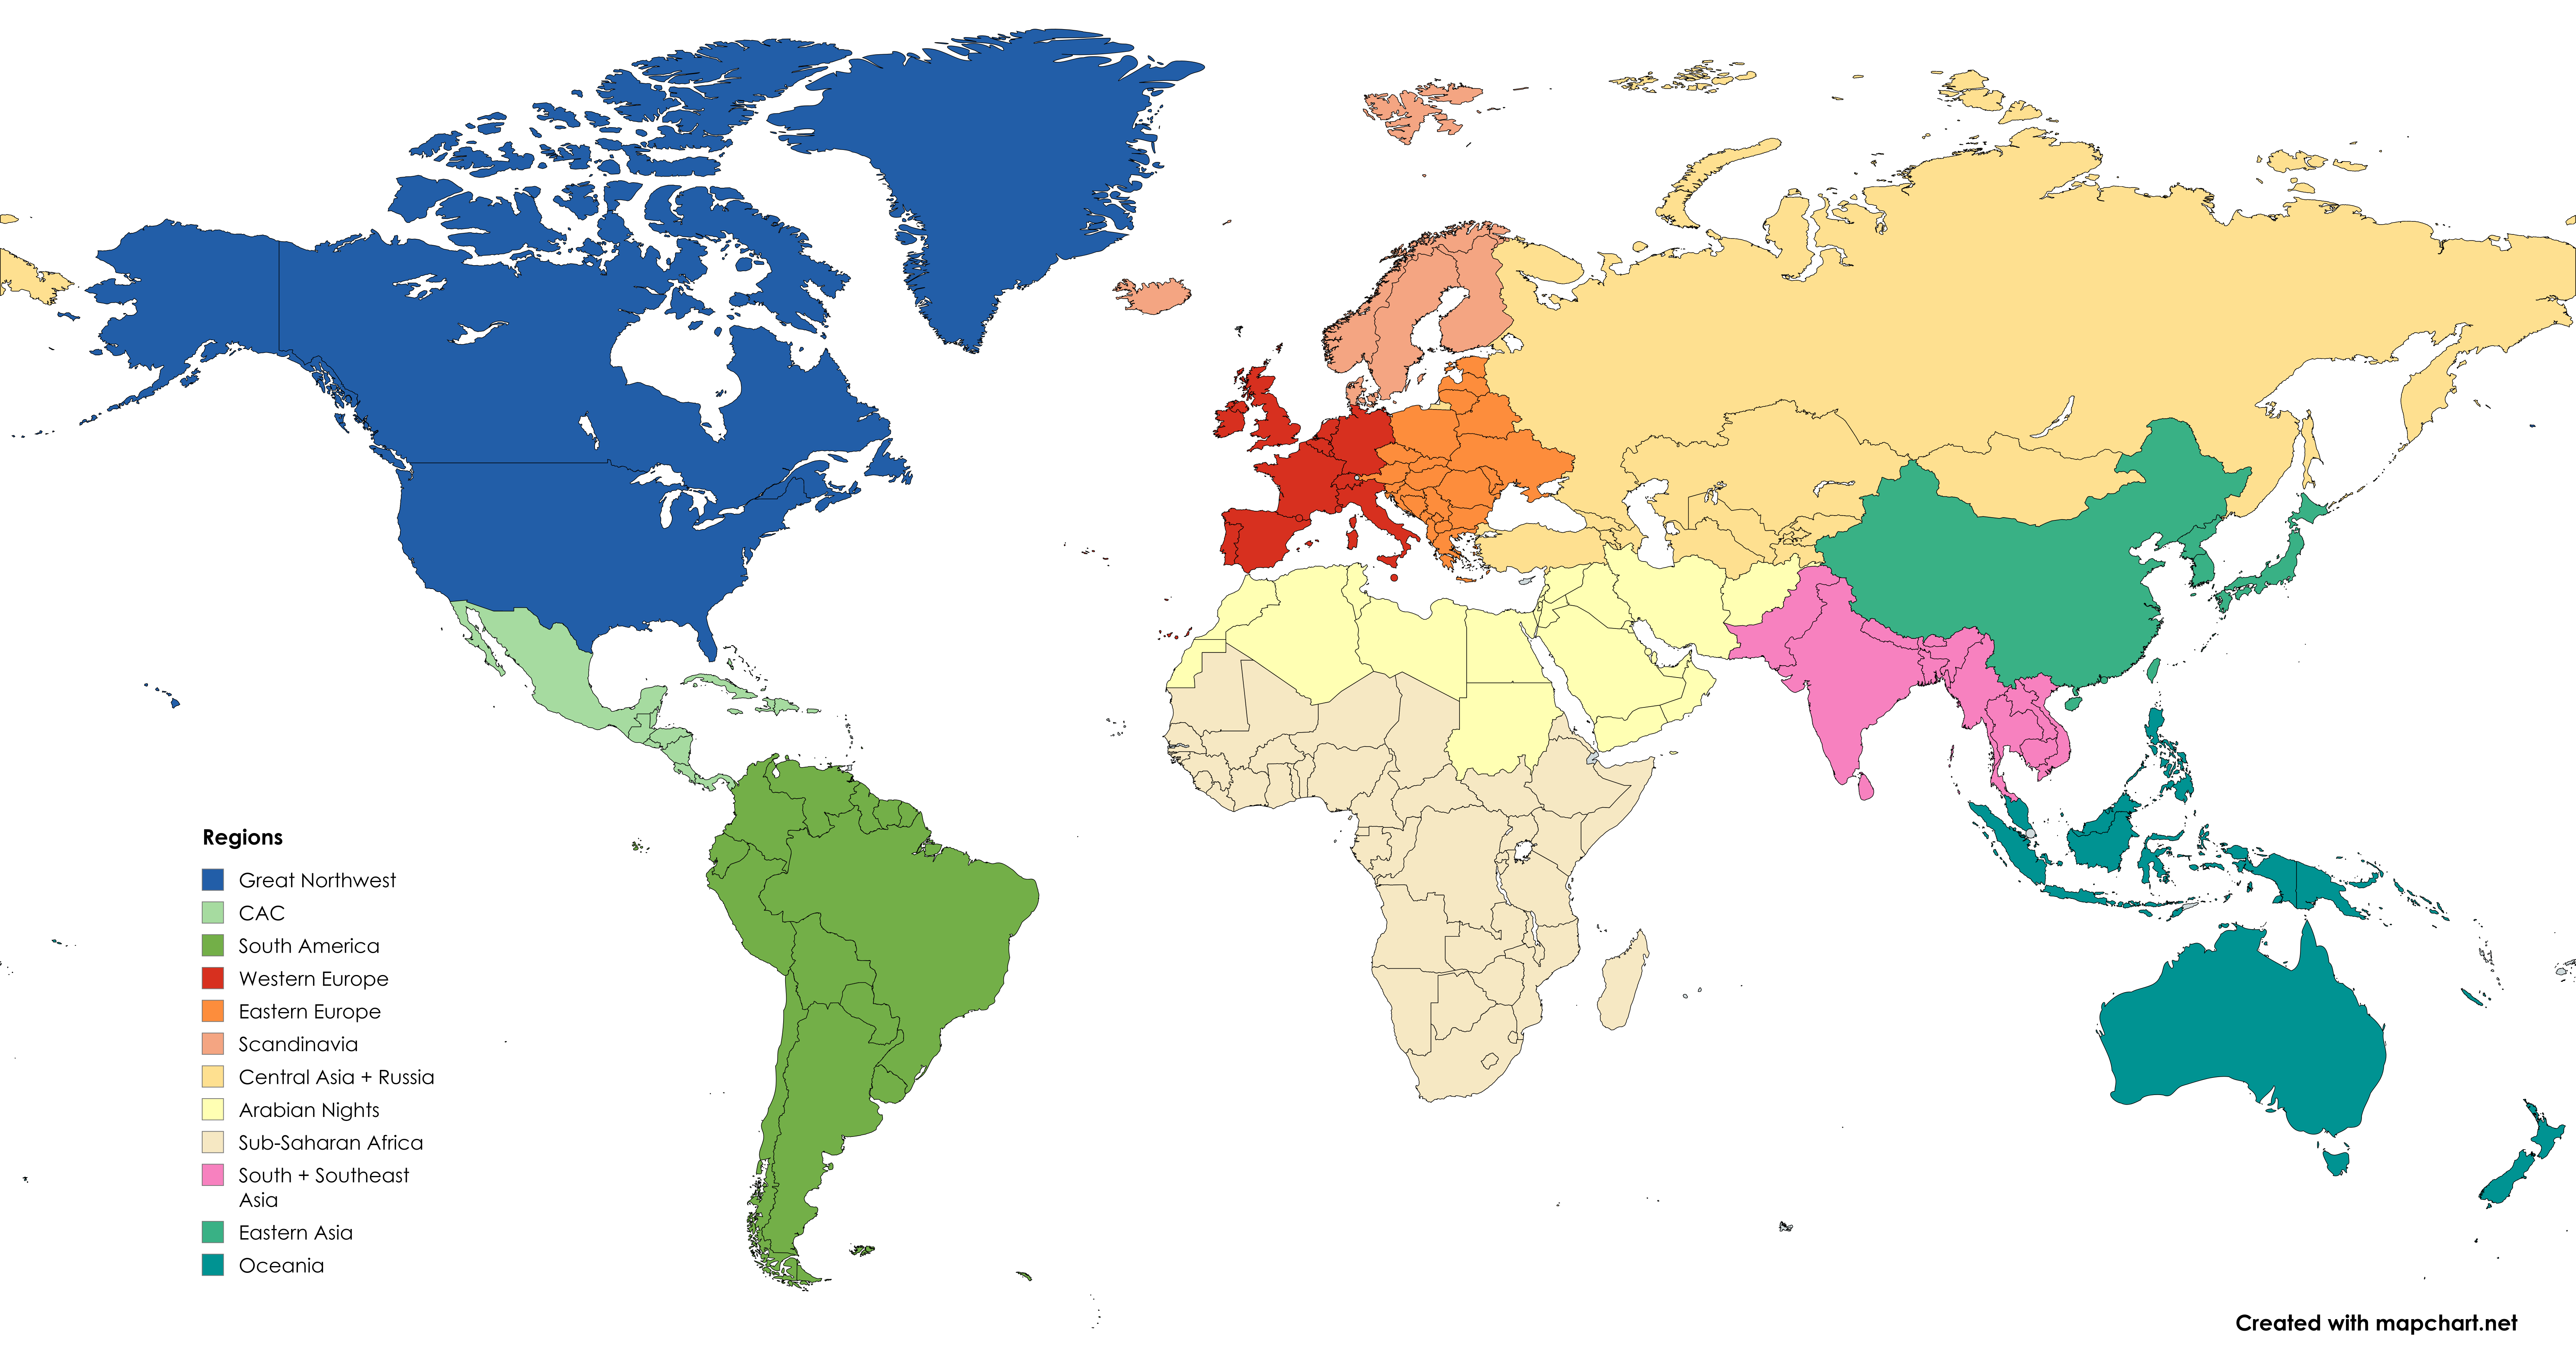

All this data was found on Kaggle thanks to the helpful links provided by Dr. Benedict, and sourced by the International Olympic Committee Research and Reference Service, published by The Guardian. https://www.kaggle.com/datasets/the-guardian/olympic-games/data

In [2]:
# Importing the necessary libraries, which are few and simple.
import pandas as pd
import matplotlib.pyplot as plt

#### Storing the datasets into separate frames. We will be cleaning them down to show the different regions, appropriately titled.

In [ ]:
dictionary = pd.read_csv('dictionary.csv')
sum_results = pd.read_csv('summer.csv')

In [12]:
# Create different lists with country codes, which will be used to make our twelve different frames.
first_list = ['USA', 'CAN']
second_list = ['MEX', 'DOM', 'DMA', 'CUB', 'CRC', 'BIZ', 'ESA', 'GUA', 'HON', 'JAM', 'NCA', 'PAN', 'PUR', 'HAI', 'BAH']
third_list = ['VEN', 'BRA', 'COL', 'BOL', 'ARG', 'ECU', 'PER', 'CHI', 'PAR', 'URU', 'GUY', 'SUR']
fourth_list = ['GBR', 'FRA', 'SPA', 'POR', 'ITA', 'GER', 'NED', 'BEL', 'IRL', 'SUI', 'AND', 'LIE', 'MON', 'LUX']
fifth_list = ['BUL', 'ROM', 'GRE', 'SLO', 'SVK', 'AUT', 'CZE', 'POL', 'BLR', 'LTU', 'LAT', 'EST', 'CRO', 'SCG', 'BIH', 'MDA', 'UKR', 'HUN', 'ALB', 'MKD']
sixth_list = ['DEN', 'ISL', 'FIN', 'SWE', 'NOR']
seventh_list = ['TUR', 'RUS', 'KAZ', 'GEO', 'MGL', 'TKM', 'AZE', 'UZB', 'TJK', 'ARM', 'KGZ']
eighth_list = ['ALG', 'MAR', 'EGY', 'KSA', 'QAT', 'BRN', 'ISR', 'PLE', 'SYR', 'SUD', 'TUN', 'LIB', 'IRQ', 'IRI', 'AFG']
ninth_list = ['ANG', 'BEN', 'BOT', 'BUR', 'BDI', 'CHA', 'COM', 'DJI', 'GEQ', 'ERI', 'ETH', 'GAB', 'GAM', 'GHA', 'GUI', 'GBS', 'KEN', 'LES', 'LBR', 'MAD', 'MAW', 'MLI', 'MTN', 'MRI', 'MOZ', 'NAM', 'NIG', 'NGR', 'RWA', 'STP', 'SEN', 'SEY', 'SLE', 'SOM', 'RSA', 'TAN', 'TOG', 'UGA', 'ZAM', 'ZIM']
tenth_list = ['PAK', 'IND', 'NEP', 'THA', 'VIE', 'BAN', 'BHU', 'CAM', 'LAO', 'MYA']
eleventh_list = ['CHI', 'TPE', 'JPN', 'KOR', 'PRK', 'HKG']
twelfth_list = ['MAS', 'AUS', 'NZL', 'PNG', 'INA', 'PHI', 'SIN', 'BRU', 'TLS']

# This is a basic showing of how the new data frames will be cut down to only show Bulgarian results,
# and the process is repeated below.
dictionary = dictionary[dictionary['Country'] == 'Bulgaria']
dictionary.head()

,Country,Code,Population,GDP per Capita
29,Bulgaria,BUL,7177991.0,6993.47736


In [13]:
# Setting the dataframes for each region, then we'll count up the medals and compare in one big table, then some year by year comparisons of similar regions.
northwest = sum_results[sum_results['Country'].isin(first_list)]
cac = sum_results[sum_results['Country'].isin(second_list)]
south_am = sum_results[sum_results['Country'].isin(third_list)]
west_eu = sum_results[sum_results['Country'].isin(fourth_list)]
east_eu = sum_results[sum_results['Country'].isin(fifth_list)]
scandis = sum_results[sum_results['Country'].isin(sixth_list)]
rus_cenAsia = sum_results[sum_results['Country'].isin(seventh_list)]
arabia = sum_results[sum_results['Country'].isin(eighth_list)]
subsaharan = sum_results[sum_results['Country'].isin(ninth_list)]
southAsia = sum_results[sum_results['Country'].isin(tenth_list)]
eastAsia = sum_results[sum_results['Country'].isin(eleventh_list)]
oceania = sum_results[sum_results['Country'].isin(twelfth_list)]

In [14]:
northwest.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
11,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
15,1896,Athens,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110M Hurdles,Gold
19,1896,Athens,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500M,Silver
21,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,400M,Gold


### Once we have sorted each region into separate dataframes, we can plot out a comparison between all the regions, using a function and making it all into one big dataframe.

In [20]:
def total_medals(df, result_col="Medal"):

    deduped = df.drop_duplicates(subset=["Year","City", "Sport", "Discipline", "Country", "Gender", "Event", result_col])
    counts = deduped[result_col].value_counts()
    gold = counts.get("Gold", 0)
    silver = counts.get("Silver", 0)
    bronze = counts.get("Bronze", 0)
    return pd.Series({
        "Gold": gold,
        "Silver": silver,
        "Bronze": bronze,
        "Total": (gold + silver + bronze)
    })

regions = {
    "US/Canada" : total_medals(northwest),
    "CAC" : total_medals(cac),
    "South Amer" : total_medals(south_am),
    "West Europe" : total_medals(west_eu),
    "East Europe" : total_medals(east_eu),
    "Scandinavia" : total_medals(scandis),
    "Central Asia" : total_medals(rus_cenAsia),
    "Arab World" : total_medals(arabia),
    "Sub-Saharan" : total_medals(subsaharan),
    "South/SE Asia" : total_medals(southAsia),
    "East Asia" : total_medals(eastAsia),
    "Oceania" : total_medals(oceania)
}
# Turn all this ^ into one dataframe

region_totals = pd.DataFrame(regions).T
region_totals["Total"] = region_totals.sum(axis=1)
region_totals.head()

,Gold,Silver,Bronze,Total
US/Canada,1038,860,788,5372
CAC,112,125,136,746
South Amer,52,76,114,484
West Europe,994,1083,1162,6478
East Europe,427,502,609,3076


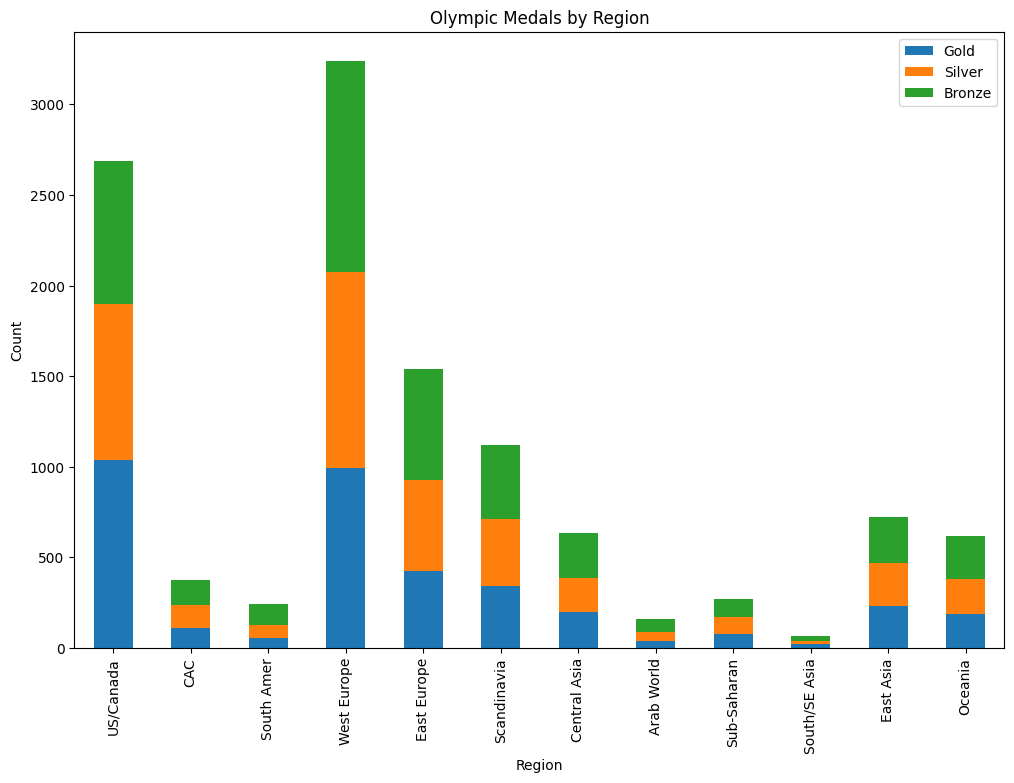

In [21]:
region_totals[["Gold", "Silver", "Bronze"]].plot(
    kind="bar", stacked=True, figsize=(12,8)
)

plt.title("Olympic Medals by Region")
plt.ylabel("Count")
plt.xlabel("Region")
plt.show()

As expected, the regions of the worlds that have largely dominated the Olympics throughout their existence have been the, for this time period, richest regions, and the ones most willing to fund sports. The US/Canada and West Europe regions are obvious, as they not only have a lot of money, but they also take sports very seriously, but a surprise third place coming in from East Europe as a region. The context of this regional breakdown has a lot to do with the Cold War, because as seen below, East Europe hasn't been as competitive as they were in the early 90s and 2000s, and a lot of the good results came because during the Cold War, the Soviets were funding a lot of sports programs in those countries and it was taken a lot more seriously, as another thing to beat the US by.

(Unrelated, but this graph is a little bit off. The results are correct in terms of what regions have most and least medals total, but the counts are off. My function kept messing up and this is the closest to an accurate result I could get. At one point the US and Canada ended up with at total of 11,000 medals. I still don't know how that happened even with double counting)

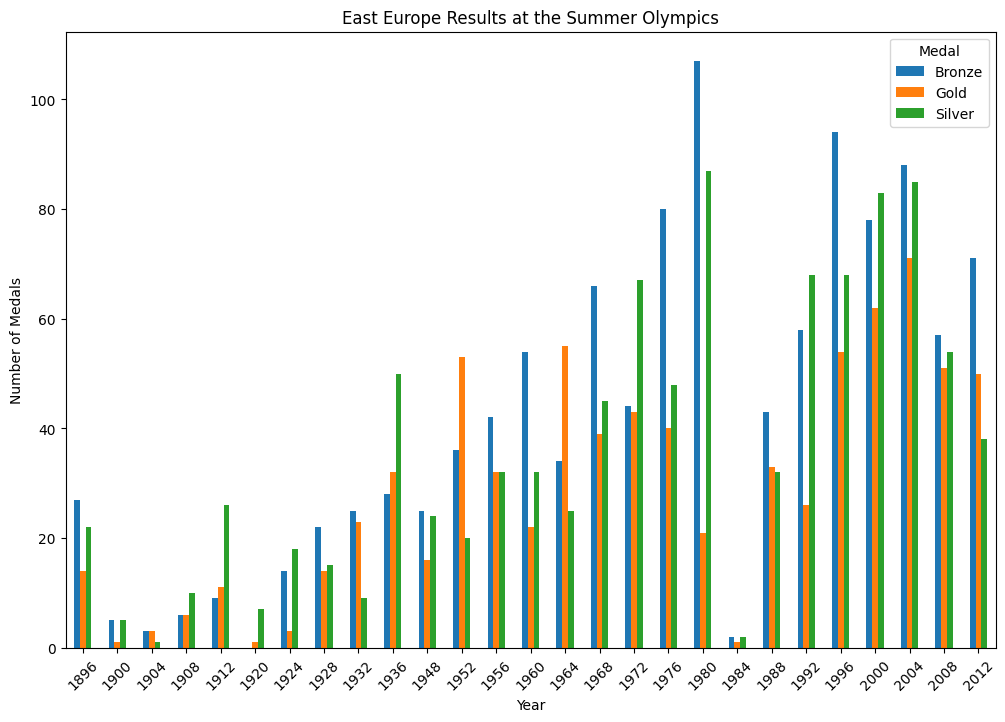

In [22]:
# Grouping the data frame by year and medals for those years, then counting them up.
medal_counts_sum = east_eu.groupby(['Year', 'Medal']).size().reset_index(name='Medal_Counts')

#Pivot so the medals become columns
pivot_sum = medal_counts_sum.pivot(index='Year', columns='Medal', values='Medal_Counts').fillna(0)

# Chart for results during summer each year
pivot_sum.plot(kind='bar', figsize=(12,8))

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('East Europe Results at the Summer Olympics')
plt.xticks(rotation=45)
plt.show()

The "Blip" in 1984 is also attributed to the Cold war, funnily enough. The Summer Olympics that year were in Los Angeles. It's also why the region's best result for Medal Totals is in 1980, although the Soviet Union (not included in this chart as I joined them as part of Central Asia due to geography) swept golds that year.

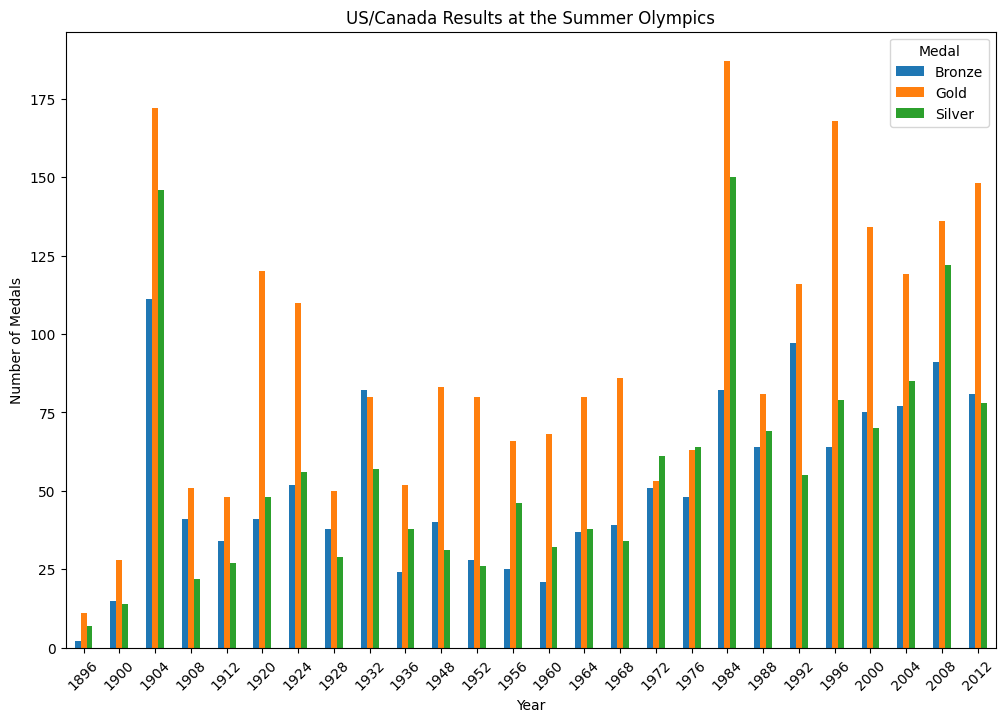

In [23]:
medal_counts_US = northwest.groupby(['Year', 'Medal']).size().reset_index(name='Medal_Counts')

#Pivot so the medals become columns
pivot_sum_US = medal_counts_US.pivot(index='Year', columns='Medal', values='Medal_Counts').fillna(0)

# Chart for results during summer each year
pivot_sum_US.plot(kind='bar', figsize=(12,8))

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('US/Canada Results at the Summer Olympics')
plt.xticks(rotation=45)
plt.show()

As we can clearly see, the US and Canada put up far more consistent results, even excluding 1984 as extenuating circumstances. In nearly all of their Olympic appearances, these two giants of sport have taken home more gold medals than anyone, especially the US. However, as we recall from the first chart, even the US and Canada did not beat out West Europe for total medal counts, and here's the breakdown:

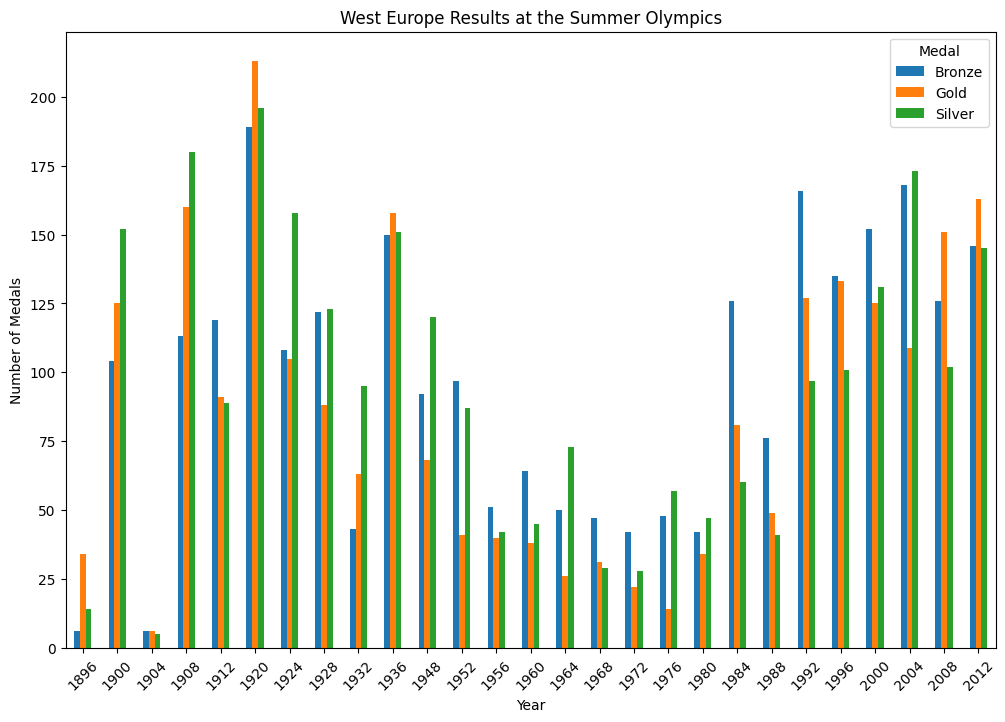

In [24]:
medal_counts_WEU = west_eu.groupby(['Year', 'Medal']).size().reset_index(name='Medal_Counts')

#Pivot so the medals become columns
pivot_WEU = medal_counts_WEU.pivot(index='Year', columns='Medal', values='Medal_Counts').fillna(0)

# Chart for results during summer each year
pivot_WEU.plot(kind='bar', figsize=(12,8))

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('West Europe Results at the Summer Olympics')
plt.xticks(rotation=45)
plt.show()

And here we see why West Europe has the most total medals, even if they're second in golds. All of this is emblematic of a bigger factor, and that has to do with how much these regions spend each year on sports. The US is largely considered the biggest sports market in the world, and that shows when it comes to gold medal counts. Obviously, my comparisons aren't entirely fair, and if even one or two countries were added to the US/Canada region or removed from the West Europe group, then US/Canada would probably have every category locked down! However, I put the US in the smallest group directly because they are the world's premier superpower when it comes to sports, and 8 rich, european countries coming together just barely edges them out. 

Regardless of rambles, for some quick stats: The total amount of money, in USD, spent from 2017-2019 by France was $44.61 billion dollars in sports. The US, annually, spends upwards of $100 billion dollars for sports funding. In comparison, Bulgaria (nestled in Southeastern Europe, and part of the East Europe group), spent just $307 million during that 2017-2019 timeframe. 

Stats above are sourced from the following:
https://www.kaggle.com/datasets/julianhorvath/sports-budget-olympic-medals-correlation?select=Sports+Budgets.csv
https://www.statista.com/statistics/970494/annual-us-sports-spend-by-type/

### Why this matters?

That's a solid question, and an important one. At the end of the day, we can draw a correlation between Olympic success and sports spending. The countries that spend the most, traditionally perform the best at the Olympics, which justifies that spending. This creates a loop where all people of the successful countries are driven to play and participate in more sports, leading to more spending, and so on and so forth. This system is, by no means, perfect and there are a number of factors that I am missing, but it goes to show that Olympic results and success is vital and impactful towards everyone. Not only do the athletes get to feel their glory at their achievements, but young and old folks alike are inspired by this and driven to partake in sports, the world's favorite pasttime.

So, while I deviated from my original question, the follow up of why are the Olympics important, is a much better question to answer. And what better reason could there be than to get everyone playing and enjoying sports.